In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/delivery_time.csv");
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<ipython-input-5-1a9f210b06e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

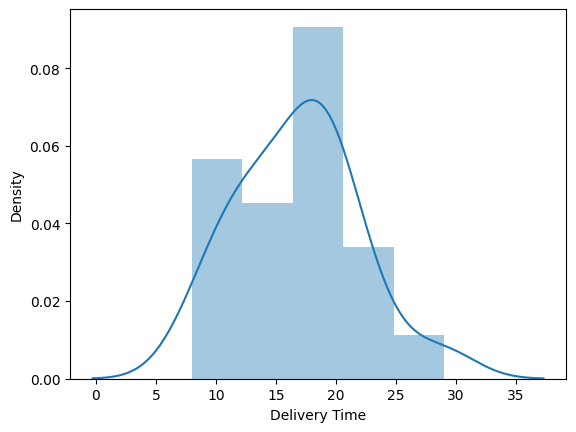

In [5]:
import seaborn as sns
sns.distplot(df['Delivery Time'])

<ipython-input-6-7b95df57ee4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

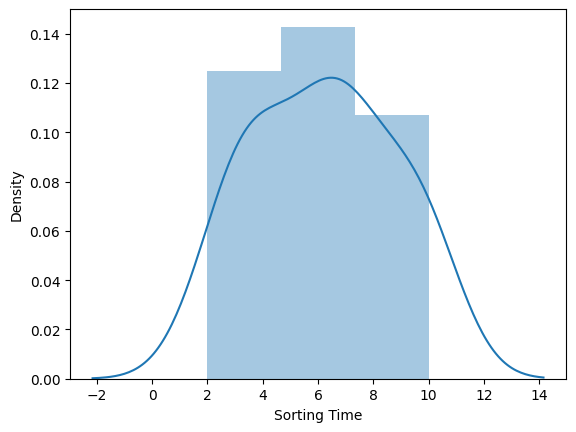

In [6]:
sns.distplot(df['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

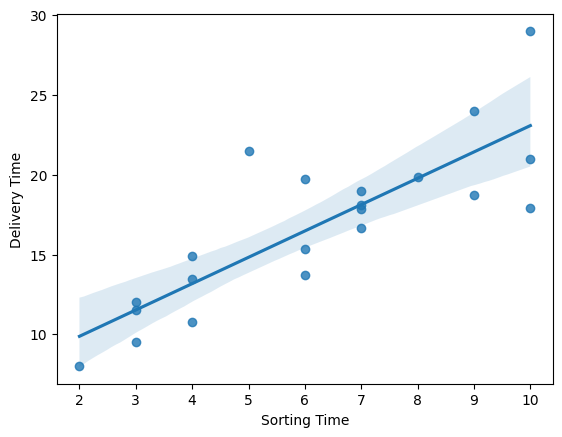

In [8]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=df)

In [9]:
df=df.rename({'Delivery Time':'deliver_time','Sorting Time':'sorting_time'},axis=1)
df

,deliver_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
import statsmodels.formula.api as smf
model=smf.ols("deliver_time~sorting_time",data=df).fit()

In [11]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
6.582734+1.649020*10

23.072933999999997

In [13]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [14]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [15]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [16]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [18]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [21]:
#Q2
data=pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [24]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<ipython-input-25-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

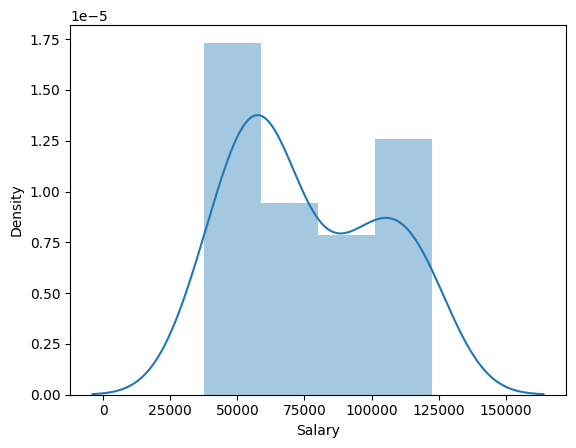

In [25]:
sns.distplot(data['Salary'])

<ipython-input-26-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

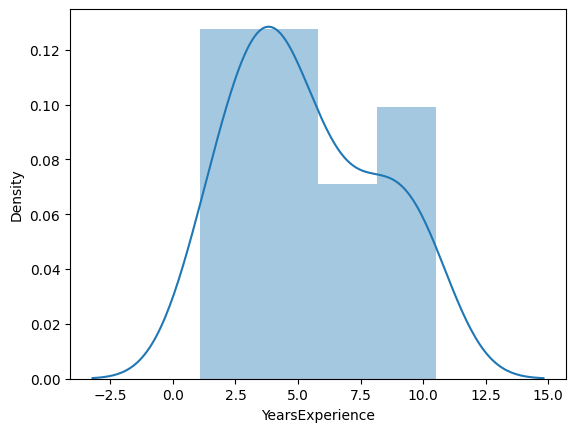

In [26]:
sns.distplot(data['YearsExperience'])

In [37]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [38]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [39]:
sun=25792.200199+9449.962321*3
sun

54142.087162

In [32]:
print(model.rsquared,model.rsquared_adj)

0.9569566641435086 0.9554194021486339


<Axes: xlabel='YearsExperience', ylabel='Salary'>

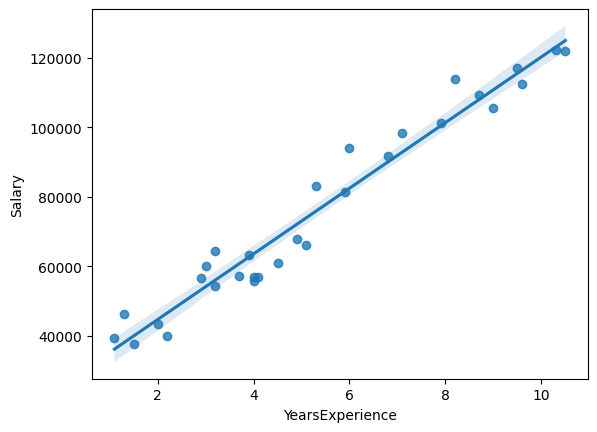

In [35]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [34]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [40]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [41]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [42]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64